# Heart Disease Prediction

In this following machine learning project, I have obtained the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

## Import Libraries
Here, we are importing all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will be using the sklearn library.


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For processing our data, I'll import a few libraries. Therefore, for splitting the available dataset for testing and training, I'll use the train_test_split method and to scale the features I'll be using StandardScaler. 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file dataset.csv. I'll use the pandas read_csv method to read the dataset.

In [83]:
dataset = pd.read_csv('heart.csv')


## Visualizing our Data

In [84]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now let us see various visual representations of the data to understand more about relationship between various features.

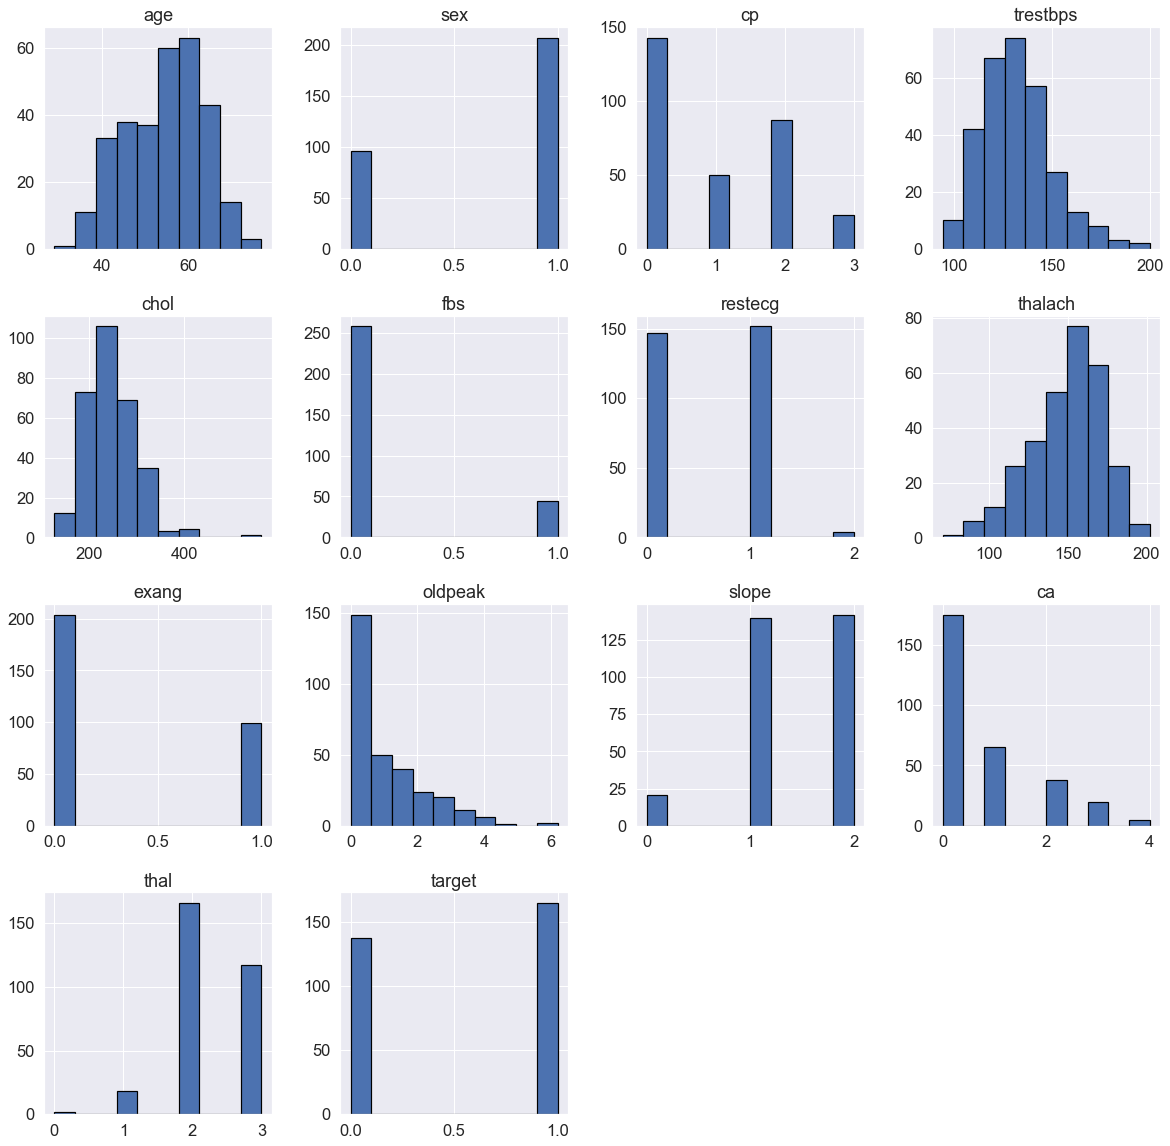

In [85]:
import seaborn as sns
sns.set(font_scale=1.5)
dataset.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [86]:
categorical_values = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_values.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [87]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

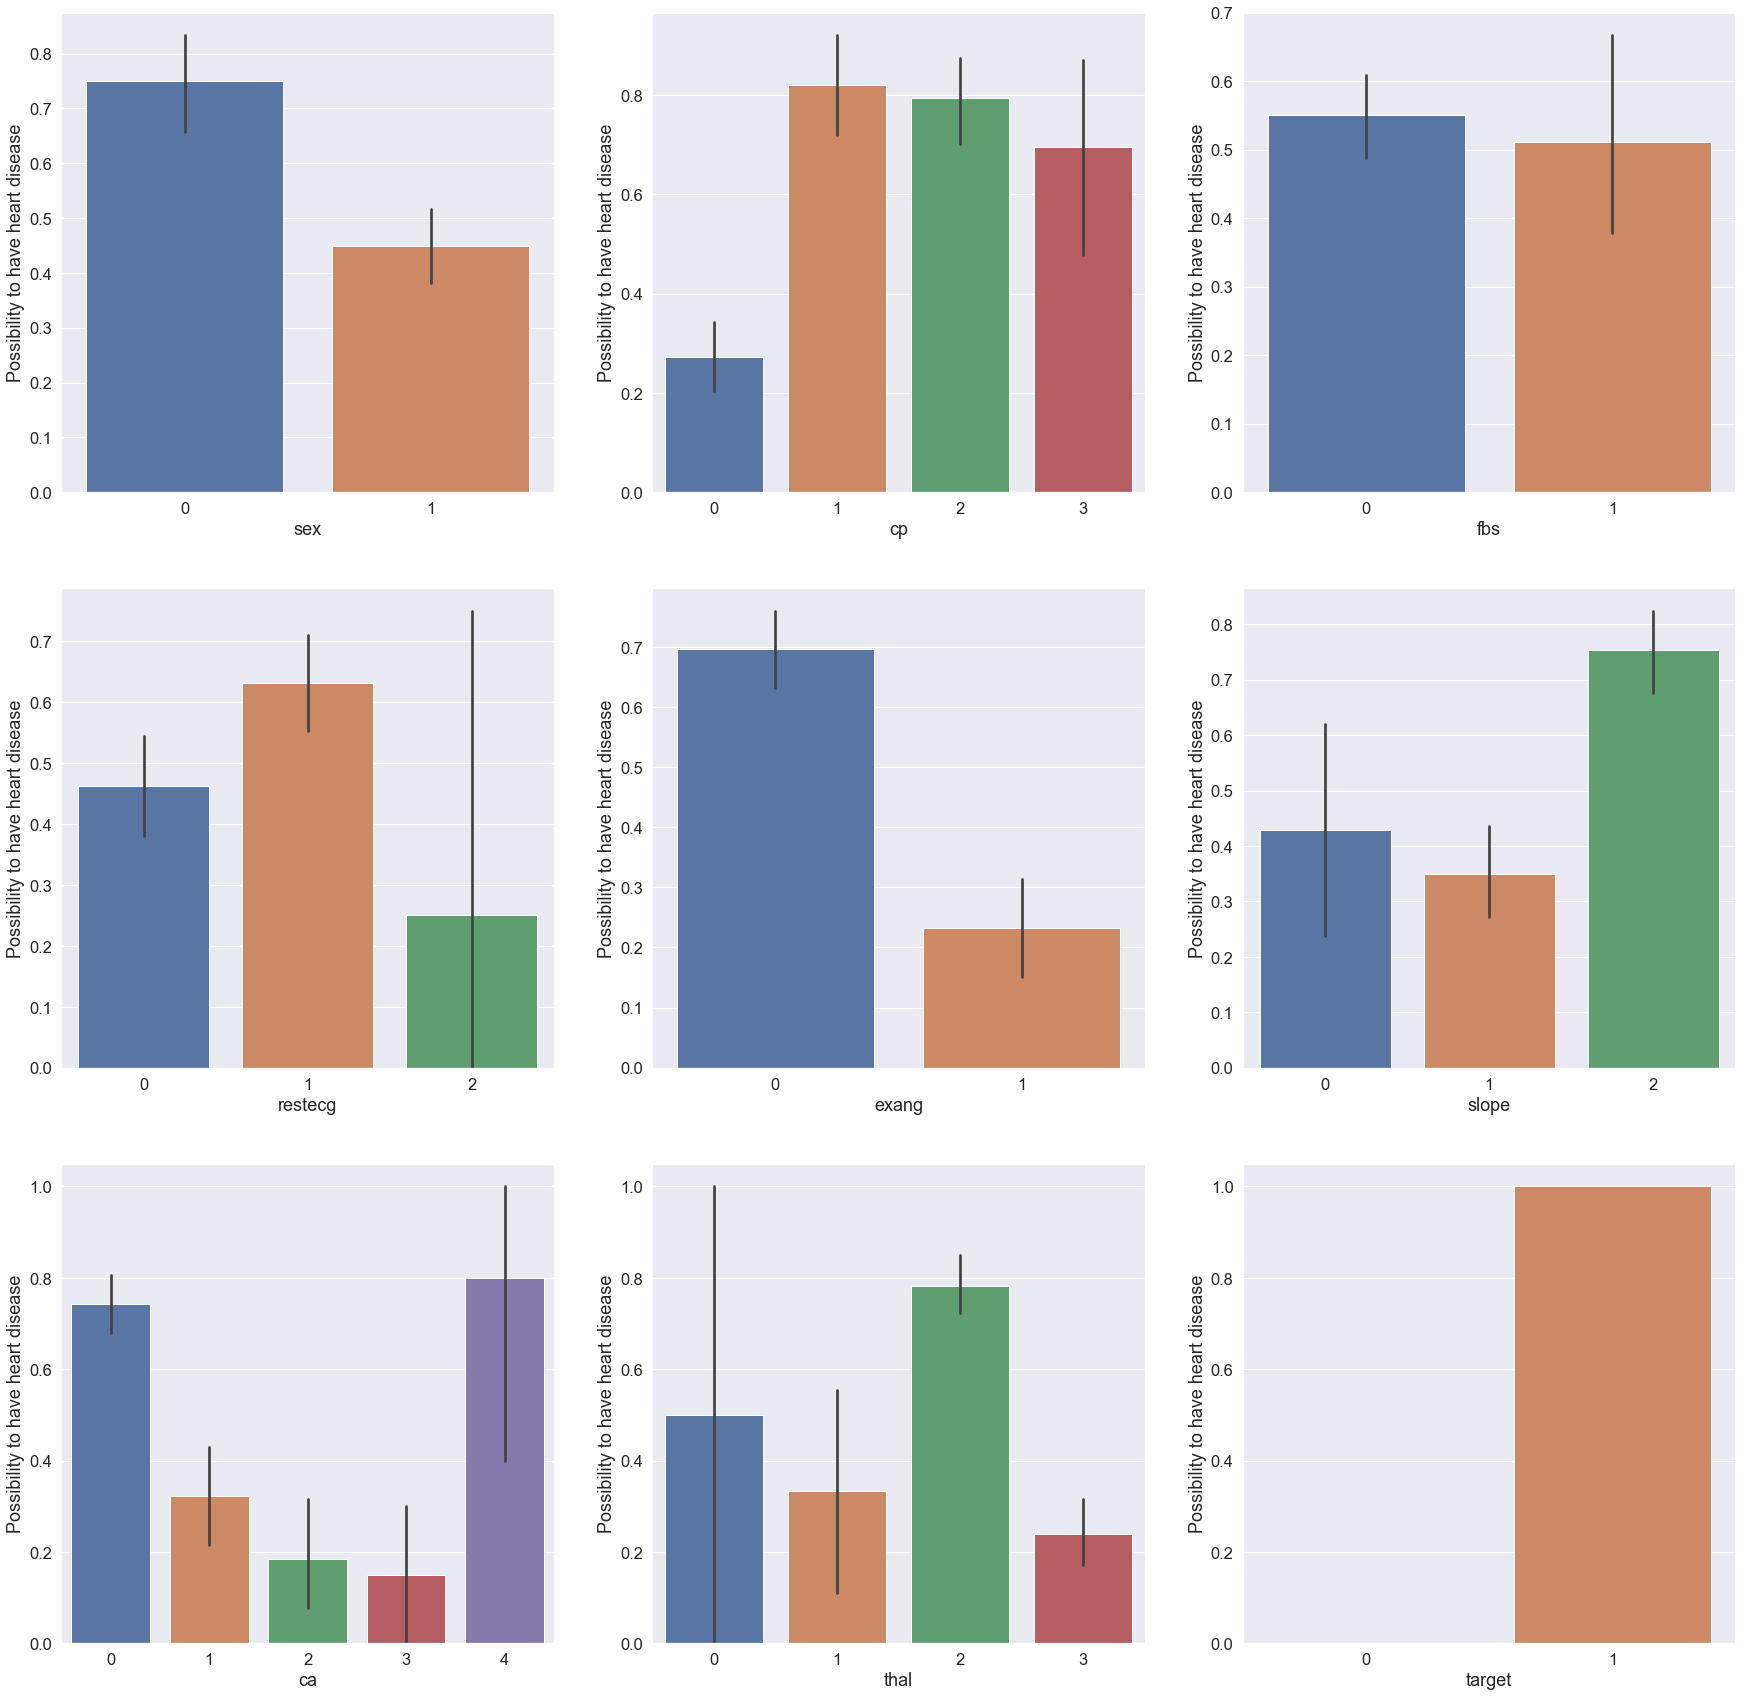

In [88]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=dataset)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

## Corrrelation Matrix

One of the best way to compare relationship between various features is to look at the correlation matrix between those features.


<AxesSubplot:>

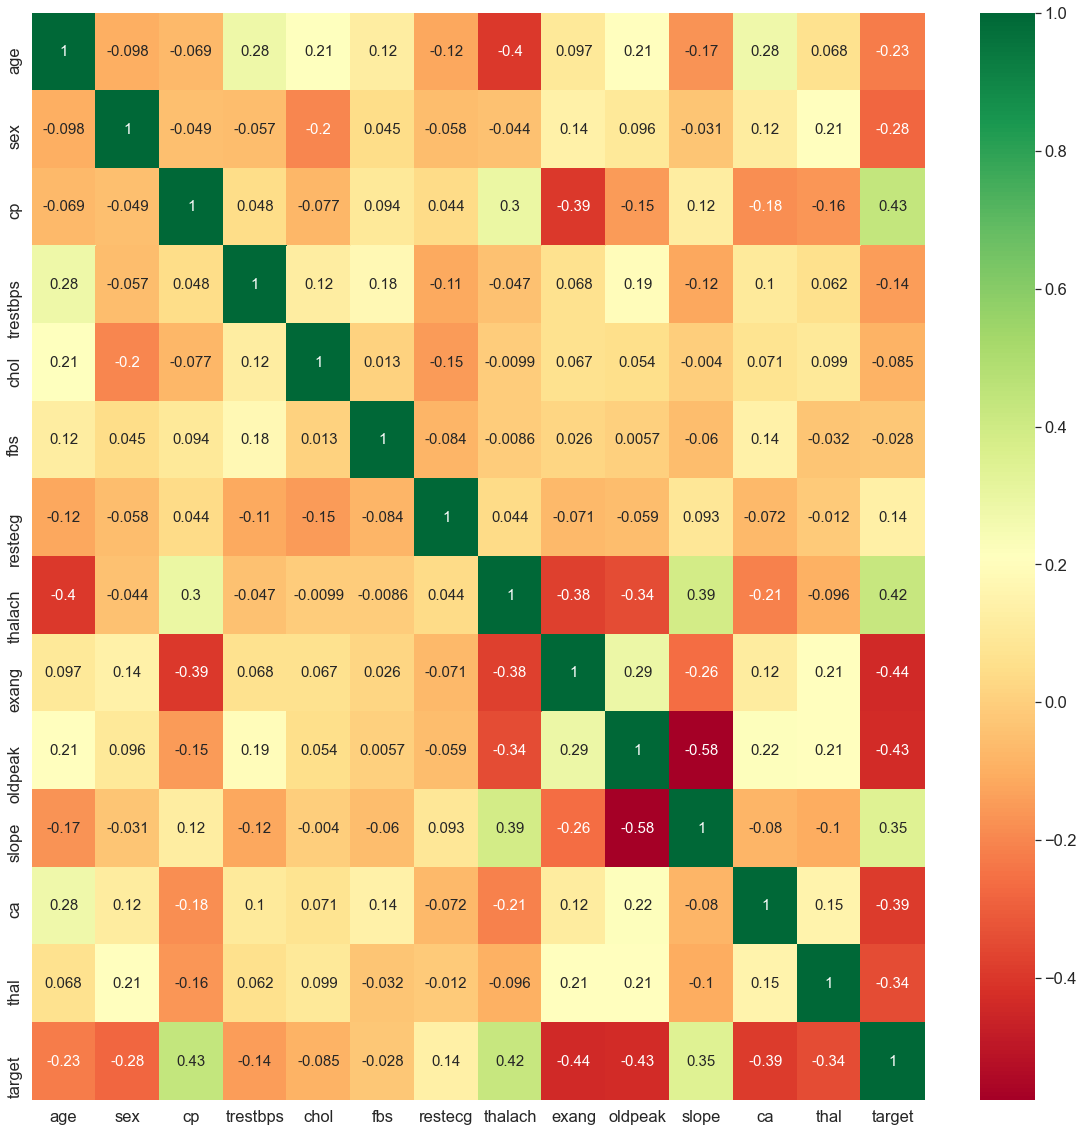

In [89]:
corr_matrix = dataset.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## Processing the data

1. At first, We clean data by eliminating empty rows and changing columns names to more readable terms.
2. Second, We  drop the columns which require more complex inputs to make model user-friendly.
3. At last, We move forward to to split the data in testing and training sets.

In [90]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = dataset.dropna()
df = df.drop(columns = ['oldpeak', 'slope', 'ca', 'thal', 'fbs', 'restecg', 'exang'])
df = df.rename(columns = {'age': 'age', 'sex': 'gender', 'cp': 'chest pain', 'trestbps': 'blood pressure', 'chol': 'cholestrol level', 'thalach': 'max heart rate', })
df.head()


,age,gender,chest pain,blood pressure,cholestrol level,max heart rate,target
0,63,1,3,145,233,150,1
1,37,1,2,130,250,187,1
2,41,0,1,130,204,172,1
3,56,1,1,120,236,178,1
4,57,0,0,120,354,163,1


In [91]:
df = shuffle(df)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)

## Model Training 
Here we train a Logistic Regression Model to predict whether a person has a heart disease or not based on the following features:

age,
gender,
chest pain,
blood pressure,
cholesterol level, and
max heart rate


In [92]:
from sklearn.linear_model import LogisticRegression



In [93]:
model = LogisticRegression()

In [94]:
model.fit(x_train, y_train)

LogisticRegression()

In [95]:
y_pred = model.predict(x_test)

## Creating a Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[33 15]
 [ 6 37]]


## Creating HeatMaps

<AxesSubplot:>

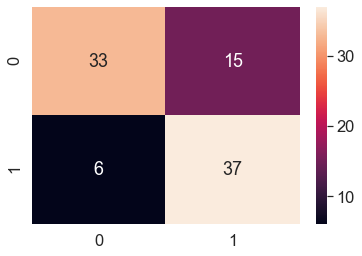

In [97]:
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

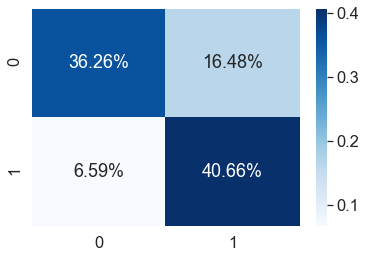

In [98]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

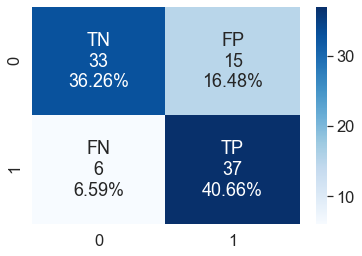

In [99]:
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

## Sensitivity, Specificity, and Precision

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

print("Accuracy")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print("Precision")
precision = precision_score(y_test, y_pred)
print(precision)
print("Recall/Sensitivity")
recall = recall_score(y_test, y_pred)
print(recall)
print("F1- Score")
f1 = f1_score(y_test, y_pred)
print(f1)

Accuracy
0.7692307692307693
Precision
0.7115384615384616
Recall/Sensitivity
0.8604651162790697
F1- Score
0.7789473684210527


## ROC Curve (TPR vs FPR)

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.865


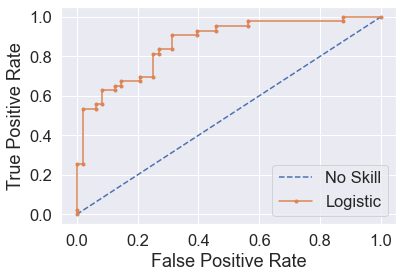

In [102]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Clustering dataset through Scikit Learn

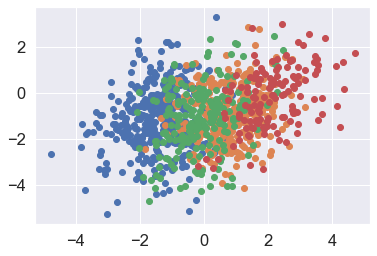

In [103]:
from numpy import where
from numpy import unique
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plot

train_data, _ = make_classification(n_samples=1000,
                                       n_features=6,
                                       n_informative=6,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

agg_mdl = AgglomerativeClustering(n_clusters=4)
agg_result = agg_mdl.fit_predict(train_data)
agg_clusters = unique(agg_result)
for agg_cluster in agg_clusters:
    index = where(agg_result == agg_cluster)

    plot.scatter(train_data[index, 0], train_data[index,1])
plot.show()

## Machine Learning Models

### K Neighbors Classifier
The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

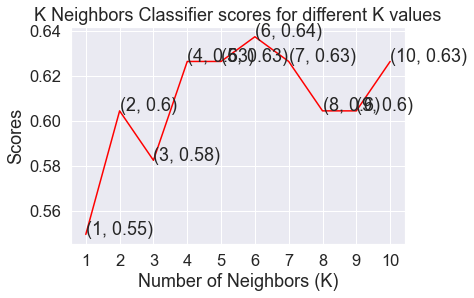

In [105]:
plt.plot([k for k in range(1, 11)], knn_scores, color = 'red')
for i in range(1,11):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 2)))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [106]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[6]*100, 6))

The score for K Neighbors Classifier is 60.43956043956044% with 8 nieghbors.


### Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [108]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [109]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

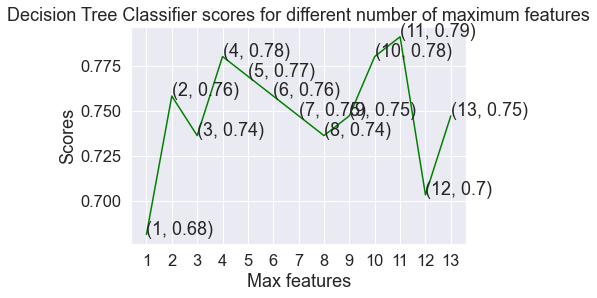

In [110]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, round(dt_scores[i-1], 2)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [111]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[11]*100, [2,4,11]))

The score for Decision Tree Classifier is 70.32967032967034% with [2, 4, 11] maximum features.


### Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

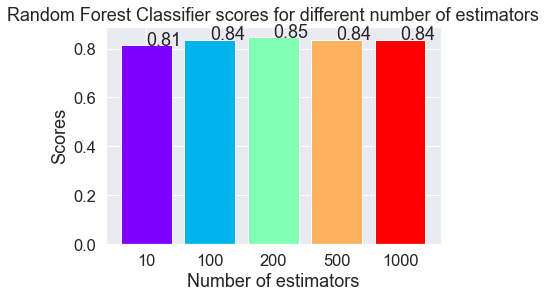

In [114]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [121]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 200]))

The score for Random Forest Classifier is 83.51648351648352% with [100, 200] estimators.


## SelectKbest()

In [116]:
from sklearn.feature_selection import RFE

### Selecting the Best important features according to Logistic Regression

In [117]:
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 4, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['sex', 'cp', 'exang', 'oldpeak'], dtype='object')

## SelectPercentile()

In [118]:
from sklearn.feature_selection import SelectPercentile, chi2
X_new = SelectPercentile(chi2, percentile=10).fit_transform(abs(X), y)
X_new.shape

(303, 2)

## SelectFromModel()

In [119]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [120]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


(303, 4)

## Conclusion 
In this project, I used Machine Learning to find or predict whether a person is suffering from a heart disease or not. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. After that,  I applied 3 Machine Learning algorithms, K Neighbors Classifier, Decision Tree Classifier and Random Forest Classifier. I varied parameters across each model to improve their scores. At the end, Random Classifier achieved the highest score of 83.5%.